This examines Traffic Crashes that occurred in the City of Chicago between 2013 to the present.

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
crash_df = pd.read_csv('Traffic_Crashes.csv')
crash_df.shape

(145255, 49)

In [148]:
crash_df.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [86]:
mapdf = crash_df[crash_df['LONGITUDE']!=0]

In [89]:
import datetime as dt
time = pd.to_datetime(mapdf['CRASH_DATE'])
mapdf.loc[0:,'Date'] = time

In [117]:
#First remove all values with 0,0 as this likely means no coordinates were recorded
BBox = (mapdf.LONGITUDE.min(), mapdf.LONGITUDE.max(),      
         mapdf.LATITUDE.min(), mapdf.LATITUDE.max())
BBox1 = (-87.6834,-87.5923,41.7695,41.8393)

In [118]:
chicago_map = plt.imread('chicago.png')
mapdf[mapdf["LONGITUDE"]  > -87.675][["LONGITUDE","LATITUDE"]]

,LONGITUDE,LATITUDE
2,-87.673711,42.007271
7,-87.534129,41.715727
9,-87.658913,41.699389
11,-87.631582,41.827873
14,-87.651902,41.882323
...,...,...
145246,-87.648499,41.767072
145247,-87.623896,41.852974
145248,-87.623706,41.854347
145252,-87.559499,41.706487


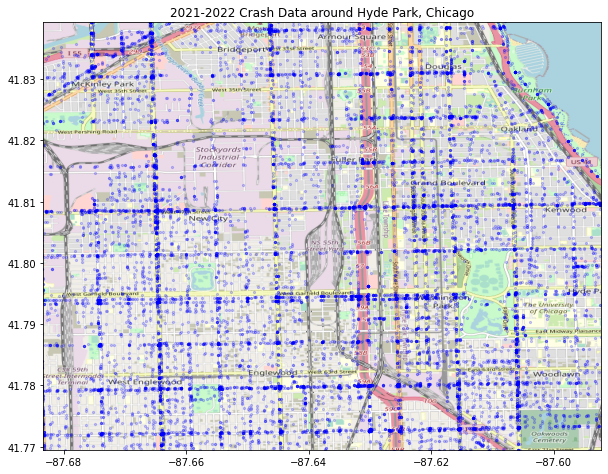

In [152]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(mapdf.LONGITUDE, mapdf.LATITUDE, zorder=1, alpha= 0.2, c='b', s=5)
ax.set_title('2021-2022 Crash Data around Hyde Park, Chicago')
ax.set_xlim(BBox1[0],BBox1[1])
ax.set_ylim(BBox1[2],BBox1[3])
ax.imshow(chicago_map,zorder=0,extent=BBox1,aspect='equal')


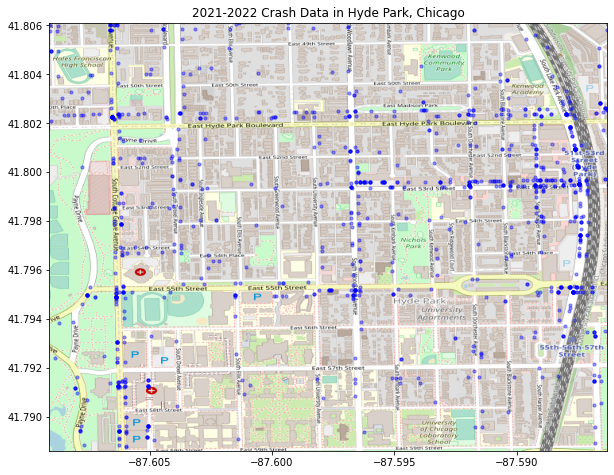

In [144]:
BBox2 = (-87.6091,-87.5863,41.7886,41.8061)

hydepark_map = plt.imread('hydepark.png')


fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(mapdf.LONGITUDE, mapdf.LATITUDE, zorder=1, alpha= 0.4, c='b', s=10)
ax.set_title('2021-2022 Crash Data in Hyde Park, Chicago')
ax.set_xlim(BBox2[0],BBox2[1])
ax.set_ylim(BBox2[2],BBox2[3])
ax.imshow(hydepark_map,zorder=0, extent=BBox2,aspect='equal')

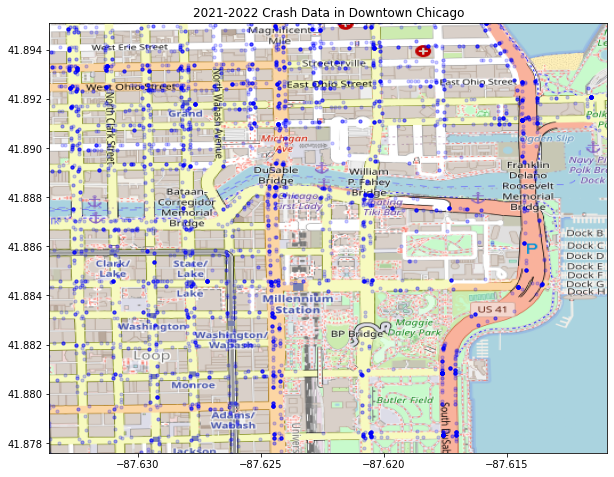

In [149]:
BBox3 = (-87.6336,-87.6109,41.8776,41.8951)

downtown_map = plt.imread('downtown.png')


fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(mapdf.LONGITUDE, mapdf.LATITUDE, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('2021-2022 Crash Data in Downtown Chicago')
ax.set_xlim(BBox3[0],BBox3[1])
ax.set_ylim(BBox3[2],BBox3[3])
ax.imshow(downtown_map,zorder=0, extent=BBox3,aspect='equal')

In [96]:
#map fatal injuries with something else

In [83]:
crash_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts().head()

UNABLE TO DETERMINE              59761
FAILING TO YIELD RIGHT-OF-WAY    15123
FOLLOWING TOO CLOSELY            12036
NOT APPLICABLE                    7455
IMPROPER OVERTAKING/PASSING       7020
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

In [65]:
crash_df.loc[crash_df['INJURIES_FATAL']>0]

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
792,4d58c462fb6df34c7c26df899905768e55169932d6c52d...,JE103264,NaN,01/04/2021 04:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,...,0.0,0.0,2.0,0.0,16,2,1,41.924598,-87.726458,POINT (-87.726457722832 41.924598156609)
1309,0b0995ab0016ef6251c800b5874cb5495d659f6c1d7824...,JE105573,Y,01/06/2021 11:20:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,...,0.0,0.0,1.0,0.0,23,4,1,41.737903,-87.642336,POINT (-87.642335992651 41.737903215157)
1477,d7172d4a700cc99c0931edf36e157535ce5bb7f93fe448...,JE106315,NaN,01/07/2021 06:44:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,...,0.0,0.0,2.0,0.0,18,5,1,41.750891,-87.625969,POINT (-87.625968505423 41.750891046593)
2212,a9639a9ca165f33173b51fb99b947fc38432616587b74b...,JE109663,NaN,01/11/2021 01:05:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,3.0,0.0,13,2,1,41.900507,-87.755882,POINT (-87.755881879547 41.900506934045)
2552,64fb2d40c91d45551f786cfa004ea22fe301795adf86fd...,JE111229,NaN,01/13/2021 12:30:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",HEAD ON,...,0.0,0.0,3.0,0.0,0,4,1,41.713924,-87.543216,POINT (-87.543216406098 41.713924081379)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143150,d13af63d1050df54e76b6fc359ab99e3aae816067372bc...,NaN,NaN,05/04/2022 09:20:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DUSK,PEDALCYCLIST,...,0.0,0.0,1.0,0.0,21,4,5,41.950396,-87.742151,POINT (-87.742151399824 41.950395646394)
143501,27be86a7104433a036cf26dea7bda6eb4ee919ec55f0cb...,NaN,NaN,05/06/2022 02:32:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,FREEZING RAIN/DRIZZLE,"DARKNESS, LIGHTED ROAD",ANGLE,...,1.0,0.0,1.0,0.0,2,6,5,41.866707,-87.676395,POINT (-87.676395238652 41.86670667489)
143802,24af6a4b9c8bc2c53556033237d909cc176e44aac92b7d...,NaN,NaN,05/06/2022 07:06:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,0.0,0.0,19,6,5,41.959708,-87.720294,POINT (-87.720294167338 41.959708258749)
144889,637fcfa39524d00f80f98906220d5837082bb63c9669ed...,NaN,NaN,05/10/2022 02:30:00 PM,25,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDESTRIAN,...,0.0,0.0,1.0,0.0,14,3,5,41.895924,-87.669664,POINT (-87.669663839189 41.895924497675)


In [72]:
crash_df.loc[[crash_df['INJURIES_FATAL']>0]:['LIGHTING_CONDITION']]

AssertionError: Start slice bound is non-scalar

In [81]:
fatalities = crash_df[crash_df.loc[:,'INJURIES_FATAL'] > 0]
data=fatalities[['INJURIES_FATAL','FIRST_CRASH_TYPE','CRASH_HOUR','LIGHTING_CONDITION']]
data.groupby('CRASH_HOUR').count()

,INJURIES_FATAL,FIRST_CRASH_TYPE,LIGHTING_CONDITION
CRASH_HOUR,,,
0,14,14,14
1,16,16,16
2,9,9,9
3,10,10,10
4,6,6,6
5,5,5,5
6,4,4,4
7,1,1,1
8,3,3,3
